<a href="https://colab.research.google.com/github/Gituatu/Classification-of-skin-cancer/blob/main/Classification_of_skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
#count the number of images in the respective classes 0=benign 1=malignent

root_dir="/content/drive/MyDrive/classification of skin cancer/melanoma_cancer_dataset"
number_of_images={}

for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))

In [ ]:
number_of_images.items()

dict_items([('malignant', 17), ('benign', 17)])

In [ ]:
os.listdir("/content/drive/MyDrive/classification of skin cancer/melanoma_cancer_dataset")

['malignant', 'benign']

# we will split the data such that
* 70 % for train data
* 15 % for validation
* 15 % for testing

In [ ]:
def dataFolder(path1,split):
  if not os.path.exists("/"+path1):
    os.mkdir("/"+path1)

    for dir in os.listdir(root_dir):
      os.makedirs("/"+path1+"/"+dir)

      for img in np.random.choice(a=os.listdir(os.path.join(root_dir,dir)), 
                                  size=(math.floor(split*number_of_images[dir])-5),
                                  replace =False):
        O=os.path.join(root_dir,dir,img)#path
        D=os.path.join("/"+path1,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print("Train Folder already exists.")

In [ ]:
#create train folder
dataFolder("content/drive/MyDrive/train",0.7)

Train Folder already exists.


In [ ]:
#create validation folder
dataFolder("content/drive/MyDrive/validation",0.15)

Train Folder already exists.


In [ ]:
#create test folder
dataFolder("content/drive/MyDrive/test",0.15)

Train Folder already exists.


In [ ]:
#images available
number_of_images={}

for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))
number_of_images.items()

dict_items([('malignant', 17), ('benign', 17)])

Model Builder

In [ ]:
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#cnn model

model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3),padding='same'))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       7

In [ ]:
# model compiler
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
# data preparing using Data Generator
def preprocessingImages(path):
  """
  input : path
  output : pre processed images
  """
  # Image Augmentation
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=10,class_mode='binary')

  return image

In [ ]:
train_data=preprocessingImages("/content/drive/MyDrive/train")

Found 312 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  """
  input : path
  output : pre processed images
  """

  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=10,class_mode='binary')

  return image

In [ ]:
test_data=preprocessingImages2("/content/drive/MyDrive/test")

Found 58 images belonging to 2 classes.


In [ ]:
valid_data=preprocessingImages2("/content/drive/MyDrive/validation")

Found 58 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping
ES=EarlyStopping(monitor="val_accuracy",min_delta=0.001,patience=6,verbose=1,mode='auto')

#Model check point
MCP=ModelCheckpoint(monitor="val_accuracy",filepath="/content/drive/MyDrive/bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

#call back
CB=[ES,MCP]

Model Training

In [ ]:
#histroy
hs=model.fit_generator(generator=train_data,steps_per_epoch=6,epochs=30,
                       verbose=1,validation_data=valid_data,validation_steps=6,callbacks=CB)

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 1.0241 - accuracy: 0.5769
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/bestmodel.h5
6/6 [==============================] - 9s 559ms/step - loss: 1.0241 - accuracy: 0.5769 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
6/6 [==============================] - 2s 420ms/step - loss: 0.6906 - accuracy: 0.5000 - val_loss: 0.6845 - val_accuracy: 0.5000
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.7009 - accuracy: 0.4667
Epoch 3: val_accuracy did not improve from 0.50000
6/6 [==============================] - 1s 202ms/step - loss: 0.7009 - accuracy: 0.4667 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.7113 - accuracy: 0.4231
Epoch 4: val_accuracy did not improve 

In [ ]:
(test_data.classes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Model Graphical Interpretation

h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

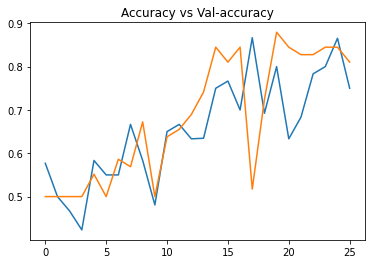

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("Accuracy vs Val-accuracy")

plt.show()

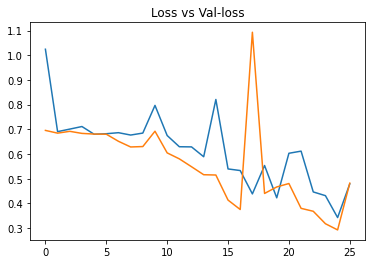

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title("Loss vs Val-loss")

plt.show()

In [ ]:
# Model Accuracy
from keras.models import  load_model

model=load_model("/content/drive/MyDrive/bestmodel.h5")

Model Accuracy

In [ ]:
acc= model.evaluate_generator(test_data)[1]
print(f"The accuracy of our model is {acc*100} %")

The accuracy of our model is 84.48275923728943 %


In [ ]:
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
train_data.class_indices

{'benign': 0, 'malignant': 1}

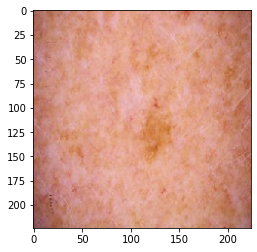

	
     The image shows Benign


In [ ]:
path="/content/drive/MyDrive/validation/benign/melanoma_110.jpg"

img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

#input_arr.shape

input_arr=np.expand_dims(input_arr,axis=0)

pred=model.predict(input_arr)[0][0]
#np.round(pred)
#pred
if (pred<0.45):
  print("\t")
  print("     The image shows Benign")
else:
  print("\t")
  print("     The image shows Malignant")

Thank you::

---



---

